## Extrae la informacion

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(r"D:\alex_\Documents\Programacion\Bases de datos\Loteria Nacional\Mayor\_LLEVAR\BASE_Valores_Premios.xlsx", dtype=object)
df_mayor = df[df['PREMIO'] >= 300000]  # Compara con una cadena '300000'

# df_pivot = df_mayor.pivot(index="ORIGEN", columns="PREMIO", values="Valor")
# df_pivot.index = pd.to_numeric(df_pivot.index.str.replace('Mayor', ''), errors='coerce')
# df_pivot.head()

C:\Users\alex_\AppData\Local\Temp\ipykernel_17920\664067129.py:7: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_pivot = df_mayor.pivot(index="ORIGEN", columns="PREMIO", values="Valor")


PREMIO,300000,850000,7000000
ORIGEN,,,
3866,15808,12578,34943
3867,12812,57056,37565
3868,39733,10658,35444
3869,1499,15257,8148
3870,7619,14660,46233


## Obten tu df

In [122]:
premios_a_filtrar = [1200, 5000, 10000]
df_filtrado = df[~df['PREMIO'].isin(premios_a_filtrar)]
df_pivot_todos = df_filtrado.pivot_table(index = "ORIGEN",columns="PREMIO", values = "Valor", aggfunc=lambda x: x).reset_index()
df_pivot_todos["ORIGEN"] = df_pivot_todos["ORIGEN"].str.replace('Mayor', '')

df_pivot_todos.head()

PREMIO,ORIGEN,3000,8000,25000,40000,80000,300000,850000,7000000
0,3866,"[120, 209, 212, 458, 470, 531, 533, 553, 730, ...","[1328, 9174, 10626, 12869, 20934, 26389, 40295...","[1314, 2648, 14459, 20251, 25436, 39739, 50867...","[3231, 4983, 22964, 35379, 42940]","[16559, 30276, 37216, 47551, 53525]",15808,12578,34943
1,3867,"[168, 200, 316, 550, 681, 725, 729, 748, 809, ...","[14642, 16045, 20121, 23311, 26286, 28225, 287...","[540, 1106, 1287, 1344, 9313, 11659, 38525, 46...","[9853, 11117, 35648, 44748, 51166]","[13491, 33474, 33709]",12812,57056,37565
2,3868,"[4, 78, 173, 578, 635, 823, 851, 904, 961, 102...","[1671, 9542, 11432, 15341, 18938, 30568, 40420...",NaN,"[2935, 25661, 42168, 42702, 59730]","[20987, 24408, 30321, 47943]",39733,10658,35444
3,3869,"[38, 61, 161, 474, 723, 799, 933, 967, 1158, 1...","[6862, 7385, 8822, 16068, 18213, 23061, 23646,...",NaN,"[2325, 24844, 27464, 52171, 52635]","[5211, 21764, 29226, 44919]",1499,15257,8148
4,3870,"[80, 274, 508, 582, 583, 618, 637, 804, 956, 1...","[6644, 15078, 15372, 23058, 25301, 27395, 2859...",NaN,"[3381, 21428, 37935, 42469, 55902]","[6560, 26025, 39698, 44395]",7619,14660,46233


## Grafica de los mas importantes

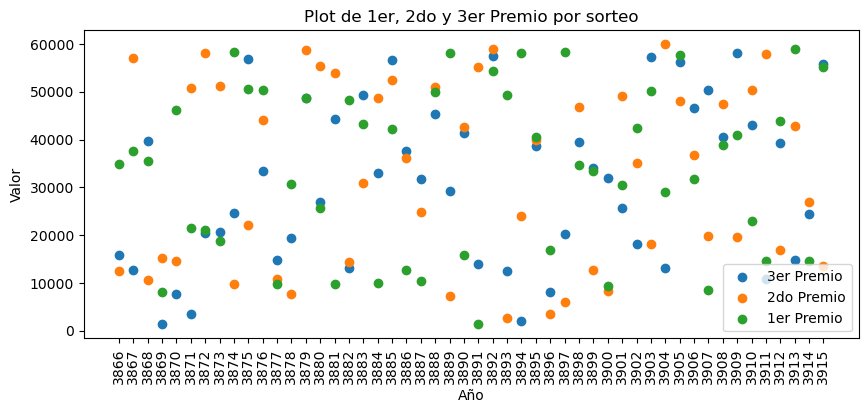

In [119]:
plt.figure(figsize=(10, 4))

plt.scatter(df_pivot_todos["ORIGEN"], df_pivot_todos[300000], label = "3er Premio")
plt.scatter(df_pivot_todos["ORIGEN"], df_pivot_todos[850000], label = "2do Premio")
plt.scatter(df_pivot_todos["ORIGEN"], df_pivot_todos[7000000], label = "1er Premio")

plt.xlabel('Año')
plt.xticks(rotation=90)
plt.ylabel('Valor')
plt.title('Plot de 1er, 2do y 3er Premio por sorteo')
plt.legend()
plt.show()

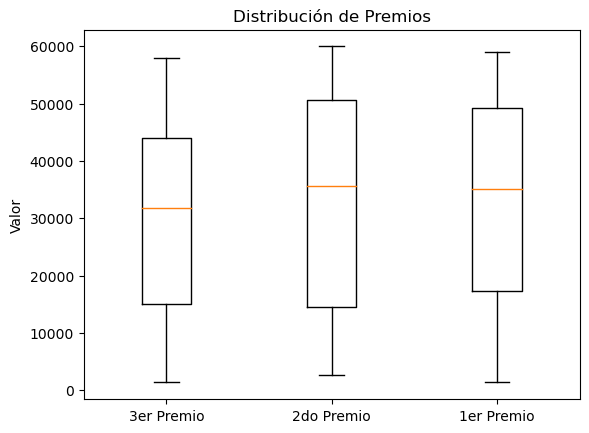

In [131]:
# df_pivot_todos.boxplot(column=[300000, 850000, 7000000])
plt.boxplot([df_pivot_todos[300000], df_pivot_todos[850000],  df_pivot_todos[7000000]], labels=["3er Premio", "2do Premio", "1er Premio"])

plt.title('Distribución de Premios')
plt.ylabel('Valor')
plt.show()

## Analisis

1. Árboles de Decisión y Bosques Aleatorios:
Pueden adaptarse a patrones no lineales y son robustos frente a datos ruidosos. Los bosques aleatorios, en particular, pueden mejorar la precisión y generalización.
2. Redes Neuronales:
Especialmente las redes neuronales recurrentes (RNN) y las redes neuronales de memoria a largo plazo (LSTM) son eficaces para modelar secuencias temporales y pueden capturar patrones complejos y relaciones no lineales.
3. Modelos de Serie Temporal:
Modelos específicos para series temporales, como ARIMA o modelos LSTM, son diseñados específicamente para la predicción de series temporales y pueden ser efectivos en la identificación de patrones temporales.

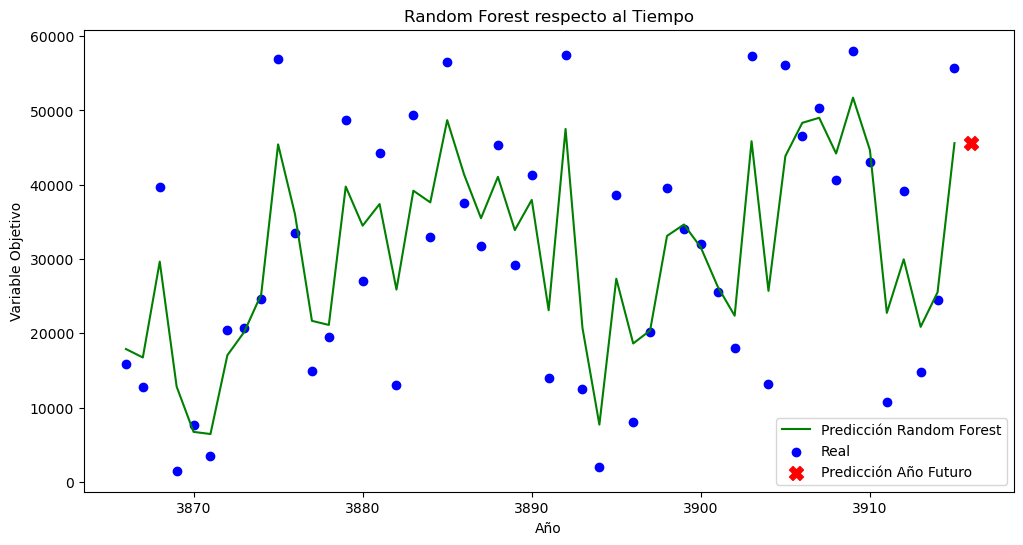

Predicción para el Año Futuro: 45595.44


In [243]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

years = np.array(df_pivot_todos["ORIGEN"].astype(int))

target_variable = df_pivot_todos[300000]

X = years.reshape(-1, 1)
y = target_variable

# Modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# predicción para el tiempo futuro
X_future = np.array([[3916]])
y_pred_future = rf_model.predict(X_future)

# predicciones
y_pred = rf_model.predict(X)

#################################################

plt.figure(figsize=(12, 6))

# variable objetivo real: X
plt.scatter(X.flatten(), y, label='Real', color='blue')

# predicciones del modelo de Random Forest
plt.plot(X.flatten(), y_pred, label='Predicción Random Forest', color='green')

# predicción para el tiempo futuro
plt.scatter(X_future.flatten(), y_pred_future, label='Predicción Año Futuro', color='red', marker='X', s=100)

plt.xlabel('Año')
plt.ylabel('Variable Objetivo')
plt.title('Random Forest respecto al Tiempo')
plt.legend()
plt.show()

print(f'Predicción para el Año Futuro: {y_pred_future[0]}')


In [241]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

# Desviacion, entre mas cercana a 0 mejor
mse = mean_squared_error(y, y_pred)
rmse = sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# R cuadrado entre mas cercano a 1 mejor
r2 = r2_score(y, y_pred)
print(f'R^2 Score: {r2}')


Mean Squared Error (MSE): 70076531.25436799
Root Mean Squared Error (RMSE): 8371.17263317201
R^2 Score: 0.8030957967221373


In [255]:
premios_principales = [300000, 850000, 7000000]
df_filtrado_principales = df[df['PREMIO'].isin(premios_principales)]
df_pivot_principales = df_filtrado_principales.pivot_table(index = "ORIGEN",columns="PREMIO", values = "NUMERO", aggfunc=lambda x: x).reset_index()
df_pivot_principales["ORIGEN"] = df_pivot_principales["ORIGEN"].str.replace('Mayor', '')

df_pivot_principales.head()

PREMIO,ORIGEN,300000,850000,7000000
0,3866,15808,12578,34943
1,3867,12812,57056,37565
2,3868,39733,10658,35444
3,3869,01499,15257,08148
4,3870,07619,14660,46233


In [275]:
df_digitos_3 = df_pivot_principales[["ORIGEN",300000]]
df_digitos_2 = df_pivot_principales[["ORIGEN",850000]]
df_digitos_1 = df_pivot_principales[["ORIGEN",7000000]]


# obtener el i-ésimo dígito
get_digit = lambda number, i: int(str(number)[i]) if len(str(number)) > i else None
# num_digits = max(len(str(number)) for number in df[300000])
num_digits = 5

#######################################

df_digitos_3c = df_digitos_3.copy()

for i in range(num_digits):
   df_digitos_3c[f'Digito_{i+1}'] = df_digitos_3c[300000].apply(lambda x: get_digit(x, i))

df_digitos_2c = df_digitos_2.copy()

for i in range(num_digits):
   df_digitos_2c[f'Digito_{i+1}'] = df_digitos_2c[850000].apply(lambda x: get_digit(x, i))
   
df_digitos_1c = df_digitos_1.copy()

for i in range(num_digits):
   df_digitos_1c[f'Digito_{i+1}'] = df_digitos_1c[7000000].apply(lambda x: get_digit(x, i))
   

df_digitos_1c.head(5)


PREMIO,ORIGEN,7000000,Digito_1,Digito_2,Digito_3,Digito_4,Digito_5
0,3866,34943,3,4,9,4,3
1,3867,37565,3,7,5,6,5
2,3868,35444,3,5,4,4,4
3,3869,08148,0,8,1,4,8
4,3870,46233,4,6,2,3,3


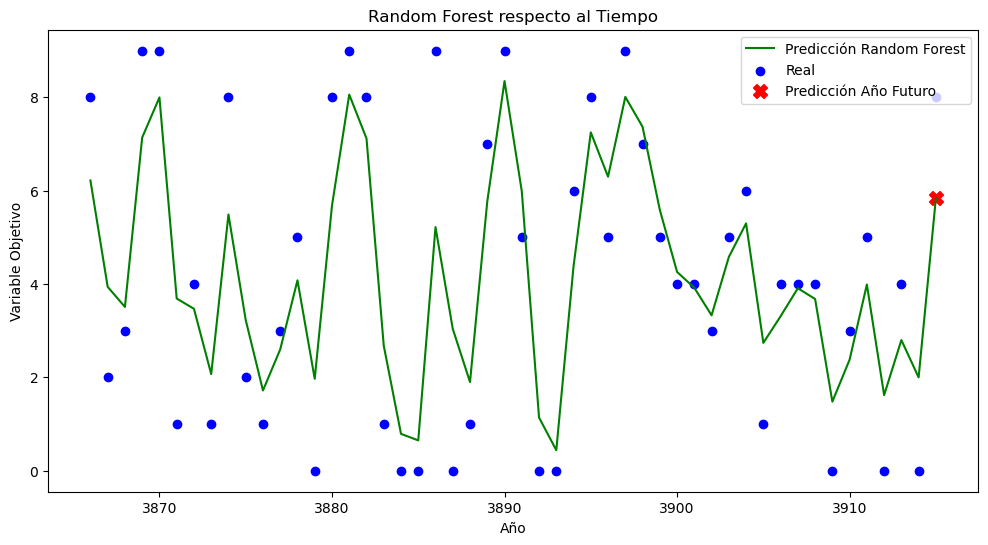

Predicción para el Digito Futuro: 5.84


In [278]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

years = np.array(df_digitos_3c["ORIGEN"].astype(int))

target_variable = df_digitos_3c["Digito_5"]

X = years.reshape(-1, 1)
y = target_variable

# Modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# predicción para el tiempo futuro
X_future = np.array([[3915]])
y_pred_future = rf_model.predict(X_future)

# predicciones
y_pred = rf_model.predict(X)

#################################################

plt.figure(figsize=(12, 6))

# variable objetivo real: X
plt.scatter(X.flatten(), y, label='Real', color='blue')

# predicciones del modelo de Random Forest
plt.plot(X.flatten(), y_pred, label='Predicción Random Forest', color='green')

# predicción para el tiempo futuro
plt.scatter(X_future.flatten(), y_pred_future, label='Predicción Año Futuro', color='red', marker='X', s=100)

plt.xlabel('Año')
plt.ylabel('Variable Objetivo')
plt.title('Random Forest respecto al Tiempo')
plt.legend()
plt.show()

print(f'Predicción para el Digito Futuro: {y_pred_future[0]}')


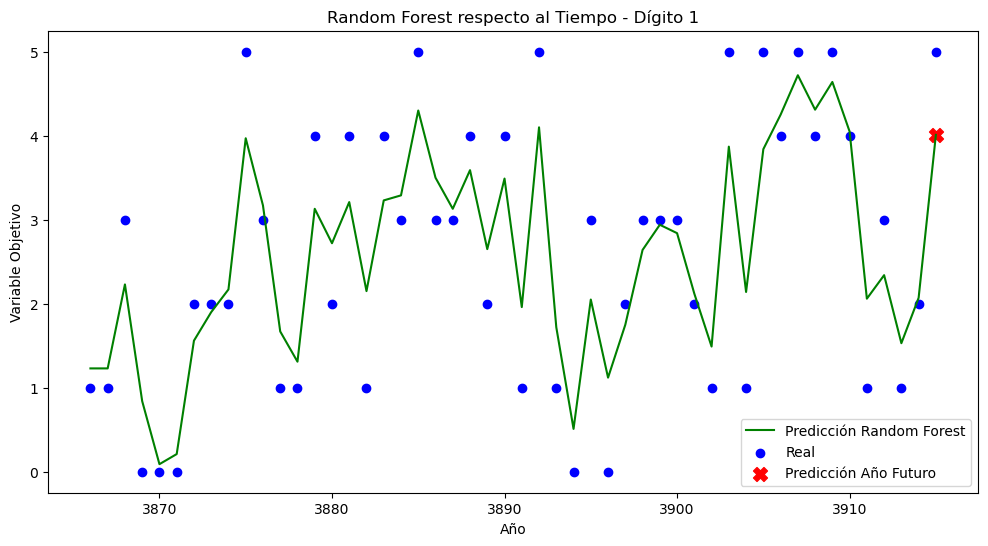

Predicción para el Digito 1 Futuro: 4.01


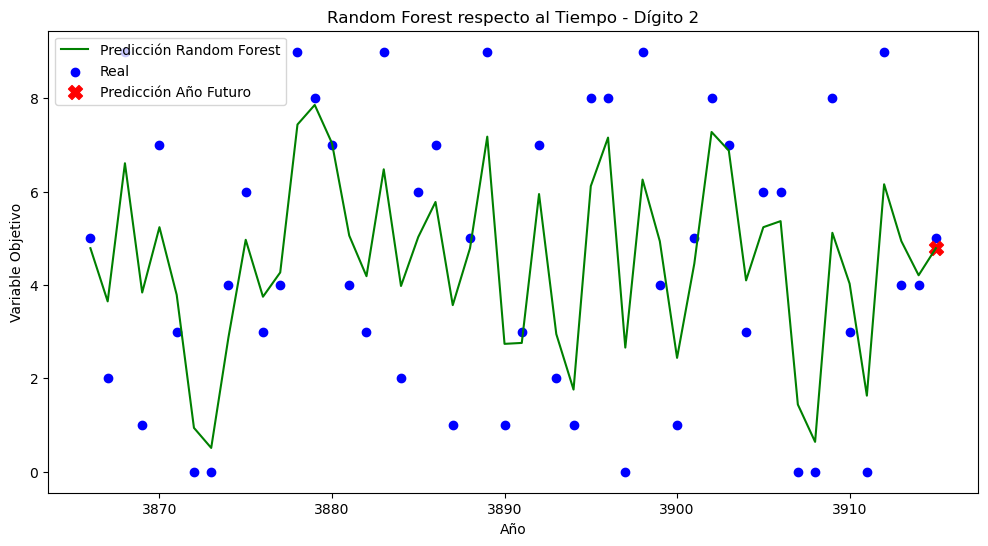

Predicción para el Digito 2 Futuro: 4.79


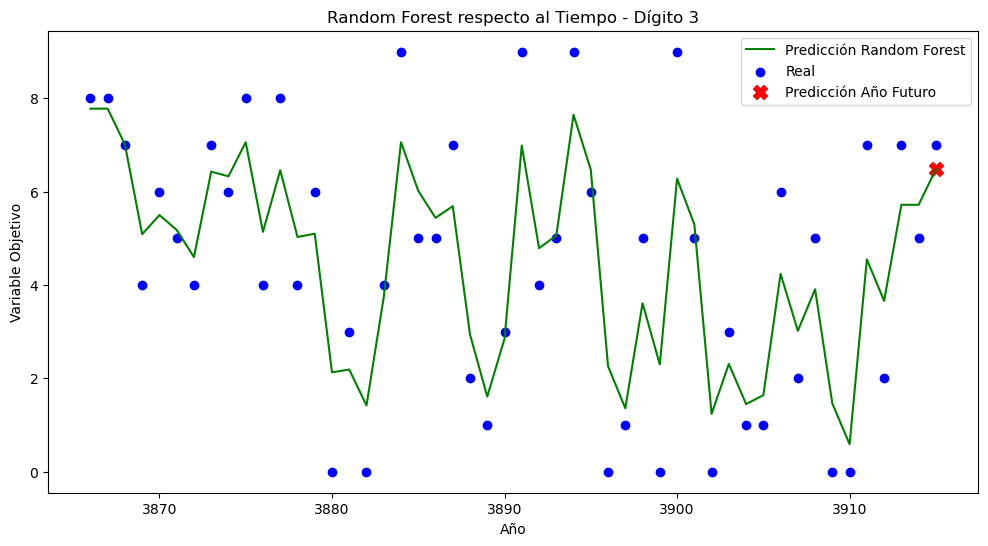

Predicción para el Digito 3 Futuro: 6.48


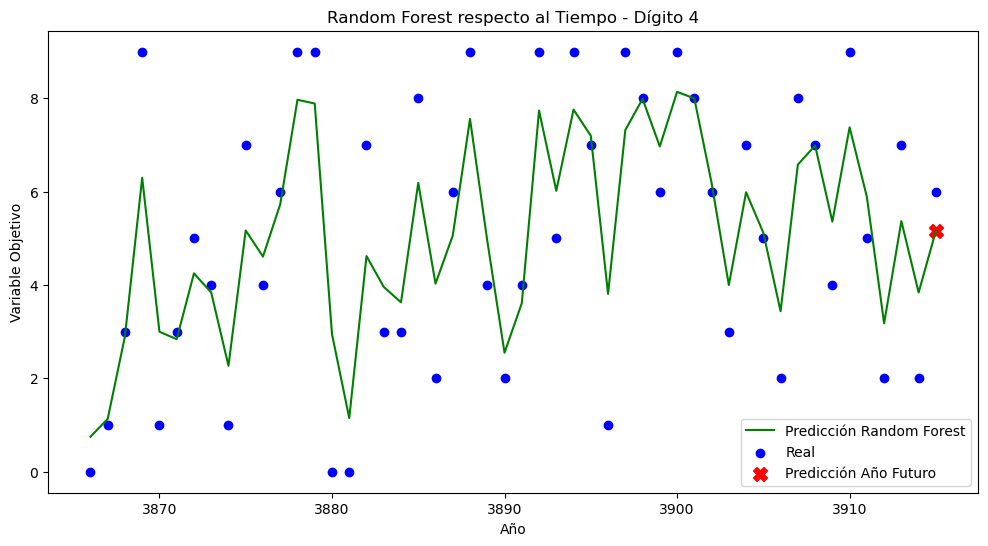

Predicción para el Digito 4 Futuro: 5.16


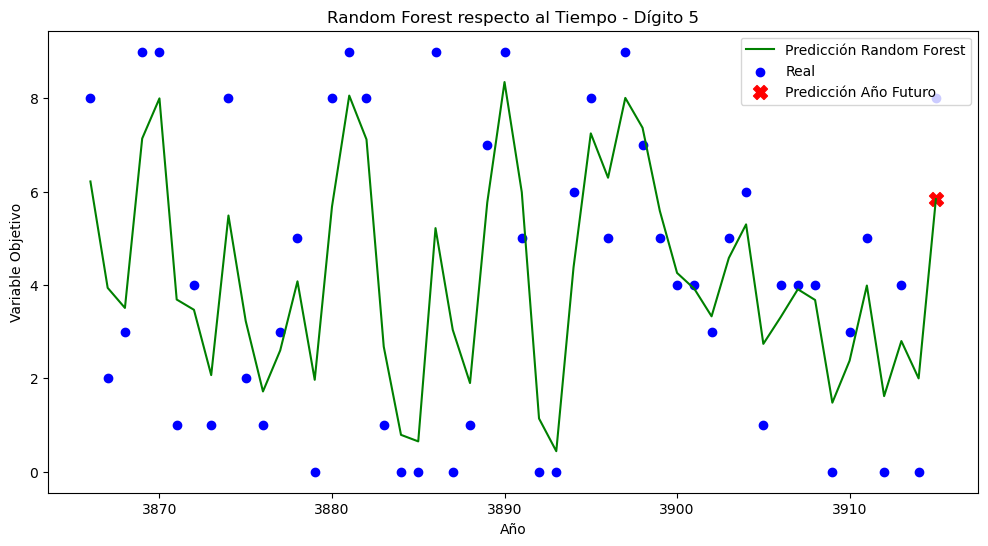

Predicción para el Digito 5 Futuro: 5.84


In [279]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Supongamos que tienes un DataFrame llamado df_digitos_3c
# Asegúrate de tener las columnas 'ORIGEN' y 'Digito_1', 'Digito_2', ..., 'Digito_5'

# Crear una lista de los nombres de las columnas de los dígitos
digit_columns = ['Digito_1', 'Digito_2', 'Digito_3', 'Digito_4', 'Digito_5']

# Crear un gráfico para cada dígito
for digit_column in digit_columns:
    years = np.array(df_digitos_3c["ORIGEN"].astype(int))
    target_variable = df_digitos_3c[digit_column]

    X = years.reshape(-1, 1)
    y = target_variable

    # Modelo de Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)

    # Predicción para el tiempo futuro
    X_future = np.array([[3915]])
    y_pred_future = rf_model.predict(X_future)

    # Predicciones del modelo
    y_pred = rf_model.predict(X)

    # Crear el gráfico
    plt.figure(figsize=(12, 6))

    # Variable objetivo real: X
    plt.scatter(X.flatten(), y, label='Real', color='blue')

    # Predicciones del modelo de Random Forest
    plt.plot(X.flatten(), y_pred, label='Predicción Random Forest', color='green')

    # Predicción para el tiempo futuro
    plt.scatter(X_future.flatten(), y_pred_future, label='Predicción Año Futuro', color='red', marker='X', s=100)

    plt.xlabel('Año')
    plt.ylabel('Variable Objetivo')
    plt.title(f'Random Forest respecto al Tiempo - Dígito {digit_column[-1]}')
    plt.legend()
    plt.show()

    print(f'Predicción para el Digito {digit_column[-1]} Futuro: {y_pred_future[0]}')


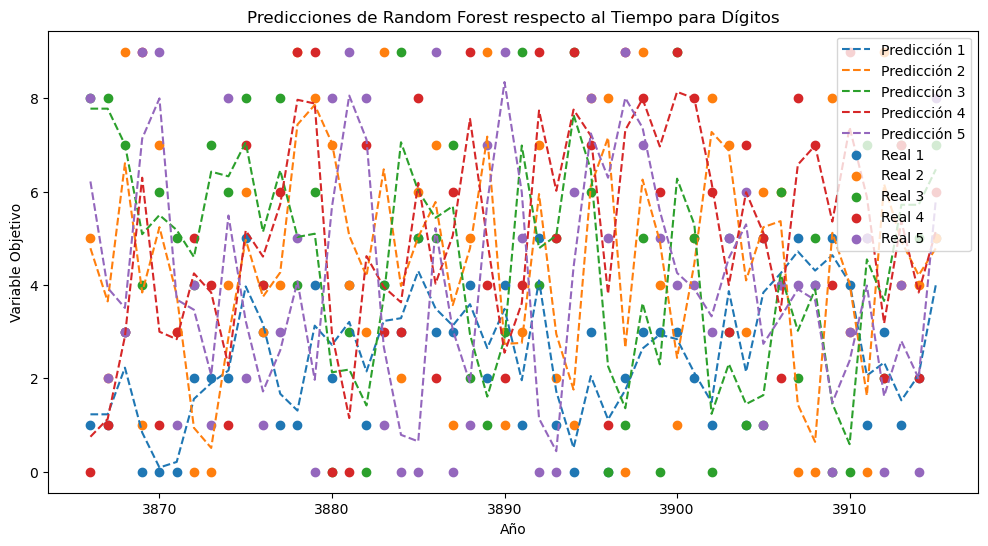

In [280]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Supongamos que tienes un DataFrame llamado df_digitos_3c
# Asegúrate de tener las columnas 'ORIGEN' y 'Digito_1', 'Digito_2', ..., 'Digito_5'

years = np.array(df_digitos_3c["ORIGEN"].astype(int))

# Crear una lista de los nombres de las columnas de los dígitos
digit_columns = ['Digito_1', 'Digito_2', 'Digito_3', 'Digito_4', 'Digito_5']

# Crear un gráfico para todos los dígitos en una sola figura
plt.figure(figsize=(12, 6))

for digit_column in digit_columns:
    target_variable = df_digitos_3c[digit_column]

    X = years.reshape(-1, 1)
    y = target_variable

    # Modelo de Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)

    # Predicciones del modelo
    y_pred = rf_model.predict(X)

    # Plotear las predicciones del modelo
    plt.scatter(X.flatten(), y, label=f'Real {digit_column[-1]}', marker='o')

    # Predicciones del modelo de Random Forest
    plt.plot(X.flatten(), y_pred, label=f'Predicción {digit_column[-1]}', linestyle='--')

plt.xlabel('Año')
plt.ylabel('Variable Objetivo')
plt.title('Predicciones de Random Forest respecto al Tiempo para Dígitos')
plt.legend()
plt.show()
